<a href="https://colab.research.google.com/github/sanky2501/Data-Preprocessing-and-Linear-Regression/blob/master/Campus_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparing The Data**

Remember the quality of your inputs decide the quality of your output.

## ~1. Importing Libraries and Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import missingvalues as no
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")
#Ignore Warnings

In [3]:
# Read dataset 
# dataframe=pd.read_csv("placement_data.csv")
# Temporarily  kept URL can be changed
url = "https://raw.githubusercontent.com/sanky2501/Data-Preprocessing-and-Linear-Regression/master/Placement_data.csv"
dataframe = pd.read_csv(url)
dataframe.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Size of data
dataframe.shape


(215, 14)

In [5]:
#Features
dataframe.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [6]:
categorical_cols=[]
numerical_cols=[]
for i in dataframe.columns:
  if dataframe[i].dtype== object:
    categorical_cols.append(i)
  else:
    numerical_cols.append(i)

#Datatypes of features
dataframe.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [7]:
# Number of all missing datapoints
dataframe.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We can see that the above data has few missing data points

# ~2. Handling the Missing Data
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

Methods to treat missing values:

1) Deletion

2) Mean/ Mode/ Median Imputation

3) Prediction Model

In [8]:
# As we can see that Any feature doesn't has more than 50% missing data
# Therefore we will not drop any column or row
# We not do Mean/ Median/ Mode Imputation for missing values in salary feature.
# Beacuse if the student is placed then only he will get the salary. 

In [9]:
# In place of missing values in salary column we put value as 0.
dataframe.fillna(0, inplace=True)

In [10]:
# Number of all missing datapoints
dataframe.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
dataframe.drop(["gender"],axis=1,inplace=True)
dataframe.drop(["ssc_b"],axis=1,inplace=True)
dataframe.drop(["hsc_b"],axis=1,inplace=True)
dataframe.drop(["hsc_s"],axis=1,inplace=True)

In [12]:
dataframe.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

## Label Encoding

In [13]:
# Output
Y =pd.DataFrame(dataframe[dataframe.columns[-1]])
# Input
X =pd.DataFrame(dataframe.drop(dataframe.columns[-1],axis=1))

In [14]:
X.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [15]:
Y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_label=X.copy()
X_label.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [17]:
# Categorical Daata
cols=["degree_t","workex","specialisation","status"]
# Using whole data to form an exhaustive list of levels
for col in cols:
  data=X[col]
  le.fit(data.values)
  X_label[col]=le.transform(X_label[col])
X_label.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,73.30,0,0,96.8,0,55.50,1


# One Hot Encoder

In [18]:


print("degree_t unique values:")
print(dataframe.degree_t.value_counts())

print("workex unique values:")
print(dataframe.workex.value_counts())

print("specialisation unique values: ")
print(dataframe.specialisation.value_counts())

print("status unique values:")
print(dataframe.status.value_counts())

degree_t unique values:
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
workex unique values:
No     141
Yes     74
Name: workex, dtype: int64
specialisation unique values: 
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
status unique values:
Placed        148
Not Placed     67
Name: status, dtype: int64


In [19]:
# Get one hot encoding of all columns 
X_one_hot = pd.get_dummies(X,columns=["degree_t","workex","specialisation","status"])
X_one_hot.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,1,0,0,1


# Feature Scaling

In [20]:
scalable_cols=["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0, 1)) # The range in which you want to scale the values
X_min_max=min_max.fit_transform(X[scalable_cols])

In [21]:
#Contains Only Float or Integer type values
pd.DataFrame(X_min_max,columns=scalable_cols).head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,0.538240,0.889621,0.195122,0.104167,0.284483
1,0.792414,0.680890,0.670244,0.760417,0.564843
2,0.497011,0.510708,0.341463,0.520833,0.247001
3,0.311482,0.247117,0.048780,0.333333,0.308096
4,0.925788,0.602965,0.568293,0.975000,0.160795


# Some Insights

array([[<AxesSubplot:title={'center':'ssc_p'}>,
        <AxesSubplot:title={'center':'hsc_p'}>],
       [<AxesSubplot:title={'center':'degree_p'}>,
        <AxesSubplot:title={'center':'etest_p'}>],
       [<AxesSubplot:title={'center':'mba_p'}>, <AxesSubplot:>]],
      dtype=object)

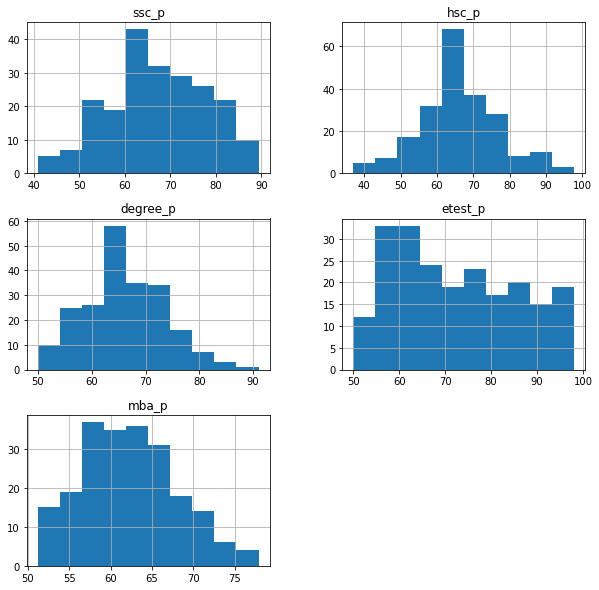

In [22]:
# Plotting Histograms to observe frequencies
X.hist(figsize=[10,10])

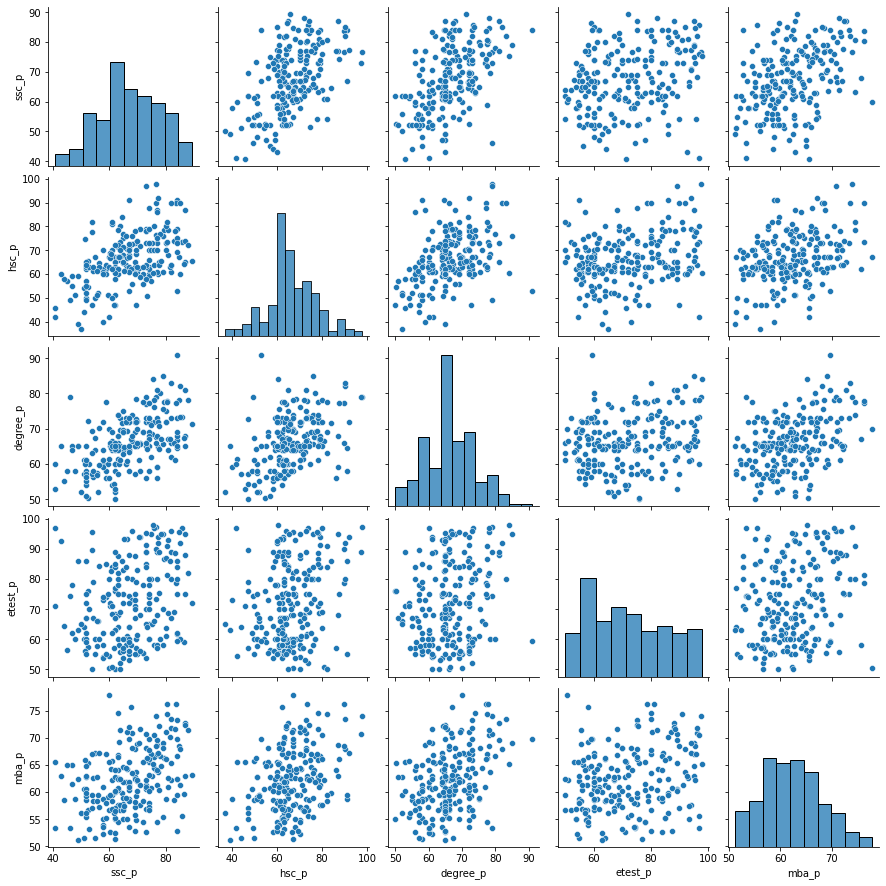

In [23]:
import seaborn as sns
sns.pairplot(X)

In [24]:
X.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


# Linear Regression

In [25]:
from sklearn import metrics
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS

In [26]:
X_label.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,73.30,0,0,96.8,0,55.50,1


In [27]:
Y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_label, Y, test_size = 0.2)

In [29]:
reg = OLS(y_train, X_train).fit()

In [30]:
y_pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
y_pred['predictions'] = reg.predict(X_test)

# Print this directly
print(reg.predict(X_test))

33     279701.392592
111     18812.397591
54     265594.903429
95     296344.224404
63     -24501.407943
190     -5834.761586
89     301059.745493
178    308789.463851
119    299276.955479
81     297042.376108
100     -1872.805843
78     320893.751603
60     270165.423308
98     277850.987794
162    279730.358744
92     282022.003073
135    260282.424632
66     257193.907417
32     264627.865609
8      277820.904331
173     26773.923808
85     290825.347675
161    -14362.402930
4      265328.002264
1      318247.121043
74     289730.851964
168    -10452.117358
126    317552.223809
207    308992.578216
124    292440.048718
91       -714.277496
114    249773.230875
198     12178.948646
19     301063.460404
80     267195.425314
97      10563.642914
209    278148.389854
197    269767.410272
79      20131.895417
18     -19847.340720
187    332132.025205
139    283414.022253
24     325289.275710
dtype: float64


In [31]:
df = pd.DataFrame({'Actual': y_test["salary"], 'Predicted': y_pred["predictions"]})
df

,Actual,Predicted
33,260000.0,279701.392592
111,0.0,18812.397591
54,216000.0,265594.903429
95,420000.0,296344.224404
63,0.0,-24501.407943
190,0.0,-5834.761586
89,210000.0,301059.745493
178,350000.0,308789.463851
119,940000.0,299276.955479
81,300000.0,297042.376108


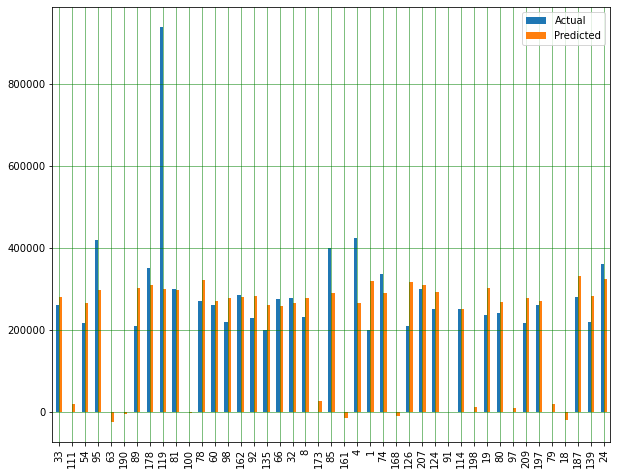

In [32]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 54800.89077894184
Mean Squared Error: 12574540546.516552
Root Mean Squared Error: 112136.25883948756
